In [ ]:
pip install numpy pandas scikit-learn tensorflow matplotlib


In [ ]:

import pandas as pd
data = pd.read_csv("/content/IMDB Dataset.csv")
data.head()




,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

reviews = data['review']
labels = data['sentiment']
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=200)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=64, input_length=200))

model.add(LSTM(64, return_sequences=True))

model.add(Dropout(0.5))

model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


Epoch 1/5
615/615 ━━━━━━━━━━━━━━━━━━━━ 176s 280ms/step - accuracy: 0.5770 - loss: 0.6634 - val_accuracy: 0.5019 - val_loss: 0.9385
Epoch 2/5
615/615 ━━━━━━━━━━━━━━━━━━━━ 167s 272ms/step - accuracy: 0.7181 - loss: 0.5703 - val_accuracy: 0.7379 - val_loss: 0.5468
Epoch 3/5
615/615 ━━━━━━━━━━━━━━━━━━━━ 172s 280ms/step - accuracy: 0.7921 - loss: 0.4502 - val_accuracy: 0.7506 - val_loss: 0.5419
Epoch 4/5
615/615 ━━━━━━━━━━━━━━━━━━━━ 202s 281ms/step - accuracy: 0.7216 - loss: 0.5407 - val_accuracy: 0.8401 - val_loss: 0.3882
Epoch 5/5
615/615 ━━━━━━━━━━━━━━━━━━━━ 201s 278ms/step - accuracy: 0.8752 - loss: 0.3295 - val_accuracy: 0.8551 - val_loss: 0.3577


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


308/308 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.8587 - loss: 0.3532
Test Accuracy: 85.51%


In [ ]:
def predict_review(review_text):
    seq = tokenizer.texts_to_sequences([review_text])
    padded = pad_sequences(seq, maxlen=200, padding='post')
    prediction = model.predict(padded)
    if prediction >= 0.5:
        return 'Positive'
    else:
        return 'Negative'

# Example prediction
review = "This movie was not Good!"
print(predict_review(review))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Negative


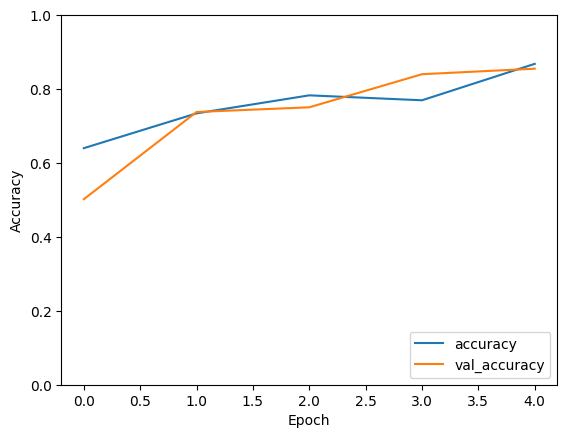

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


308/308 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step


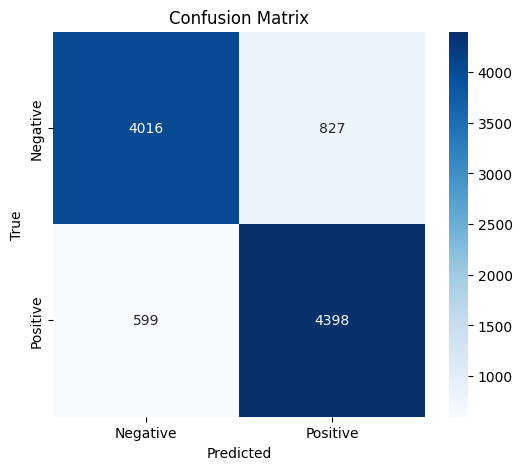

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
y_pred = (model.predict(X_test_pad) >= 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Logistic Regression Accuracy: 89.24%


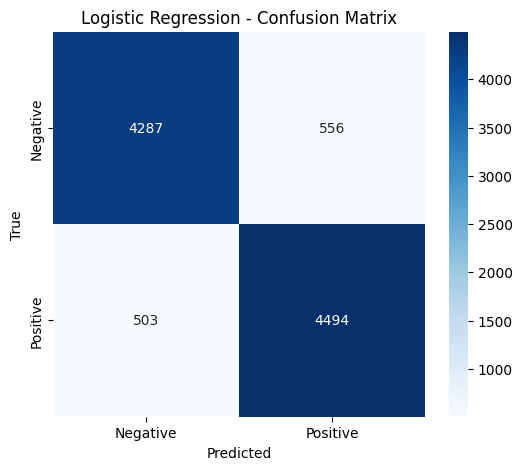

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4843
           1       0.89      0.90      0.89      4997

    accuracy                           0.89      9840
   macro avg       0.89      0.89      0.89      9840
weighted avg       0.89      0.89      0.89      9840



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/IMDB Dataset.csv")

# Split data into features and labels
reviews = data['review']
labels = data['sentiment']

# Encode labels: 'positive' -> 1, 'negative' -> 0
labels = labels.map({'positive': 1, 'negative': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Convert text data into numerical form using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))
